### Bike Sharing Regression Assignment
#### Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.How well those variables describe the bike demand-
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### Business Goal
A model for the demand for shared bikes with the available independent variables has to be created. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

### Reading the data

In [797]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [798]:
# importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [799]:
# reading the dataset
bike = pd.read_csv("day.csv")

In [800]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [801]:
#check shape of dataframe
bike.shape

(730, 16)

In [802]:
#check metadata info of the dataframe
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


there is no null or missing values present in dataframe

In [803]:
#check dataframe numerical stats
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Visualizing & Undestanding the data

In [804]:
# checking for duplicates
bike.drop_duplicates(inplace=True)

In [805]:
# checking shape after dropping rows
bike.shape

(730, 16)

In [806]:
#dropping columns which are not relevant
#instant column is not required as it stores record index
#dteday is not required as data can be interpretated by year and month columns

bike.drop(['instant','dteday'], axis=1, inplace=True)

In [807]:
# casual & registered can be dropped as we will be considering cnt as target variable
bike.drop(['casual','registered'], axis=1, inplace=True)

In [808]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [809]:
#mapping categorical columns

#season
bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

#weekday
bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

#months
bike.mnth = bike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

#weathersit
bike.weathersit = bike.weathersit.map({1:'clear',2:'misty',3:'light_snowrain',4:'heavy_snowrain'})

#yr
#bike.yr = bike.yr.map({0:'2018',1:'2019'})

In [810]:
#checking the data
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


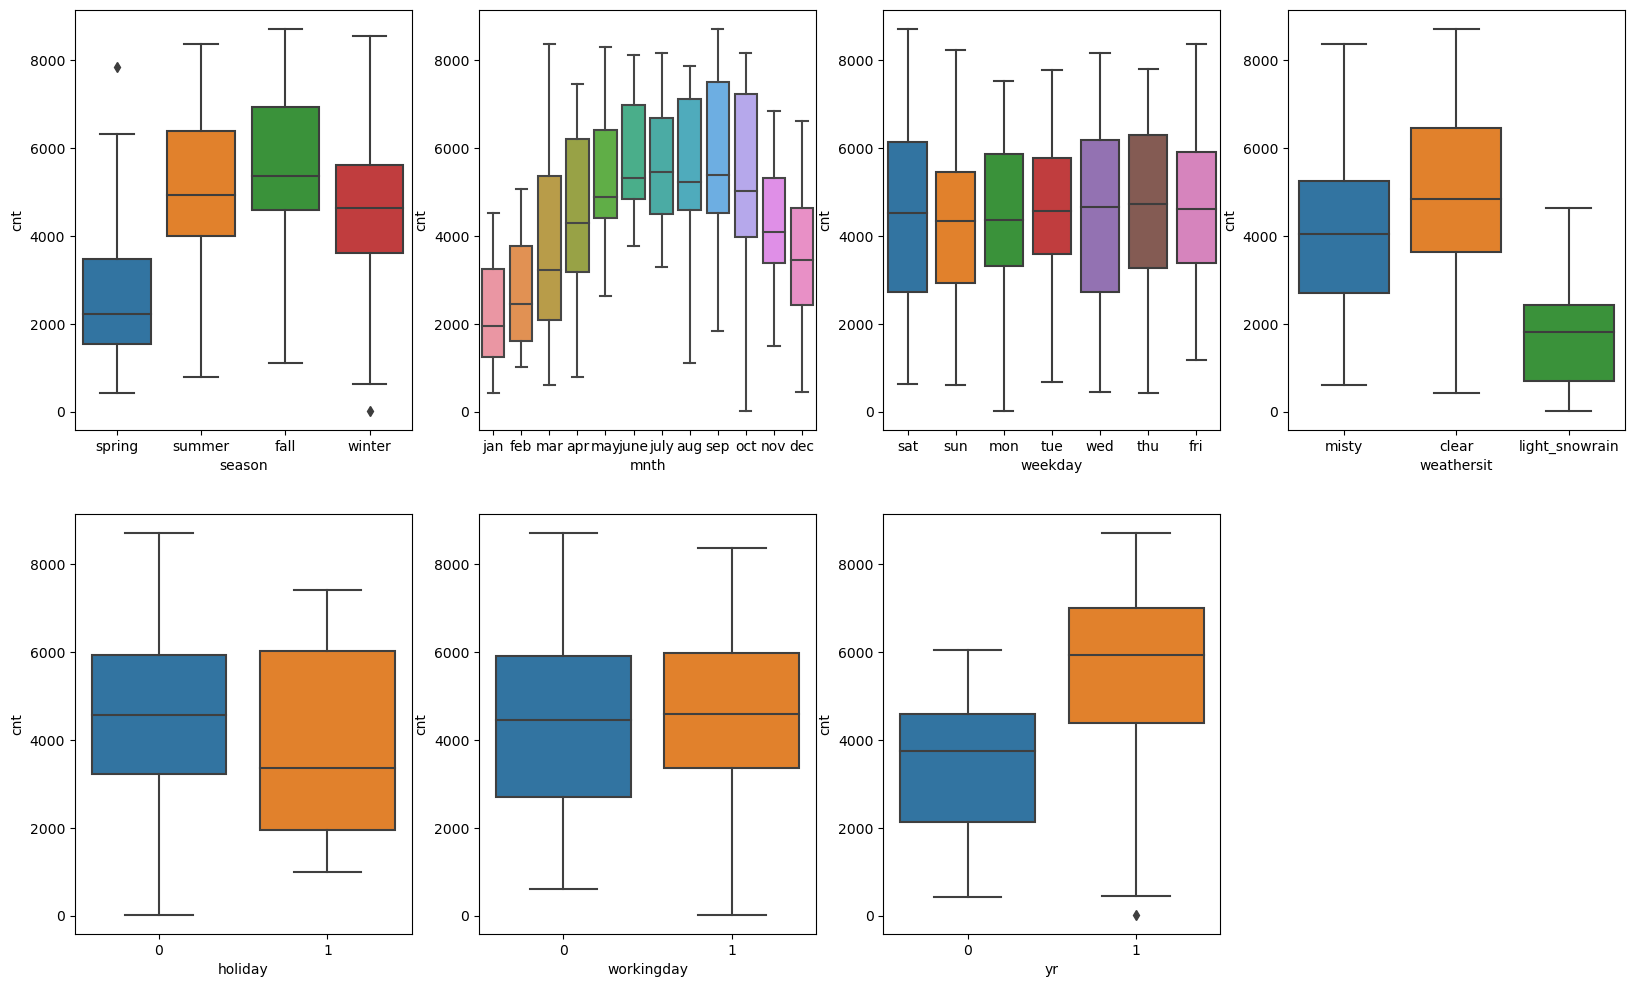

In [811]:
#analysing categirical values using box plot

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

#### Observations

- Fall seems to have more booking as compared to other seasons.
- Jun, July, Aug, Sep & October has more number of booking of ride.
- More number of usage is in Clear weather
- More number of booking are in holidays which is obvious
- There is little drop in booking in working day as compared to non working day.
- Booking increase in 2019 as compared to 2018

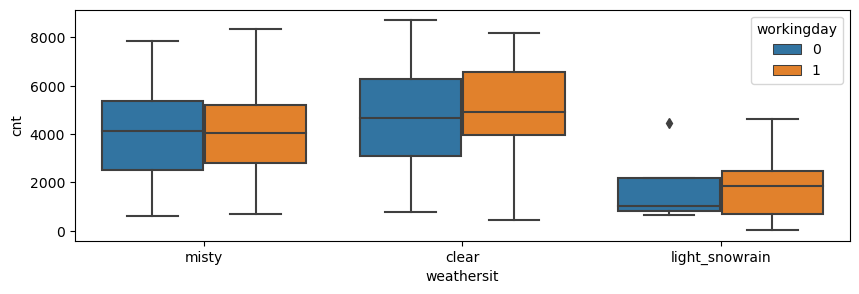

In [812]:
#visualise some of these categorical features parallely by using the hue argument. 
#Below is the plot for weathersit with workind day as the hue.

plt.figure(figsize = (10, 3))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'workingday', data = bike)
plt.show()

In [813]:
# function for creating bar plots for categorical values

def plot_bar_graphs(col):
    plt.figure(figsize = (10,3))
    plt.subplot(1,2,1)
    sns.barplot(x=col,y='cnt',data=bike)
    plt.subplot(1,2,2)
    sns.barplot(x=col,y='cnt',data=bike, hue='yr')
    plt.legend(labels=['2018', '2019'])
    plt.show()

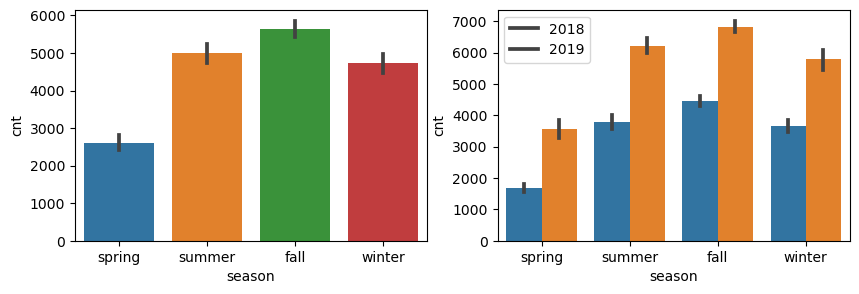

In [814]:
#plotting for season

plot_bar_graphs('season')

Fall season has more number of booking. Booking increased in 2019 as compared to 2018.

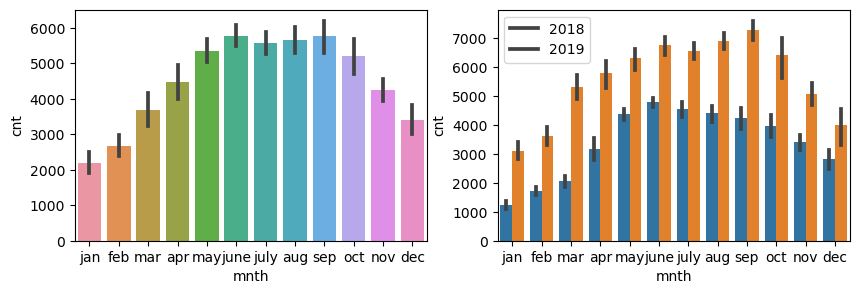

In [815]:
#plotting for season

plot_bar_graphs('mnth')

Jun-Sep has highest number of booking. Booking has increased in 2019 as compared to 2018.

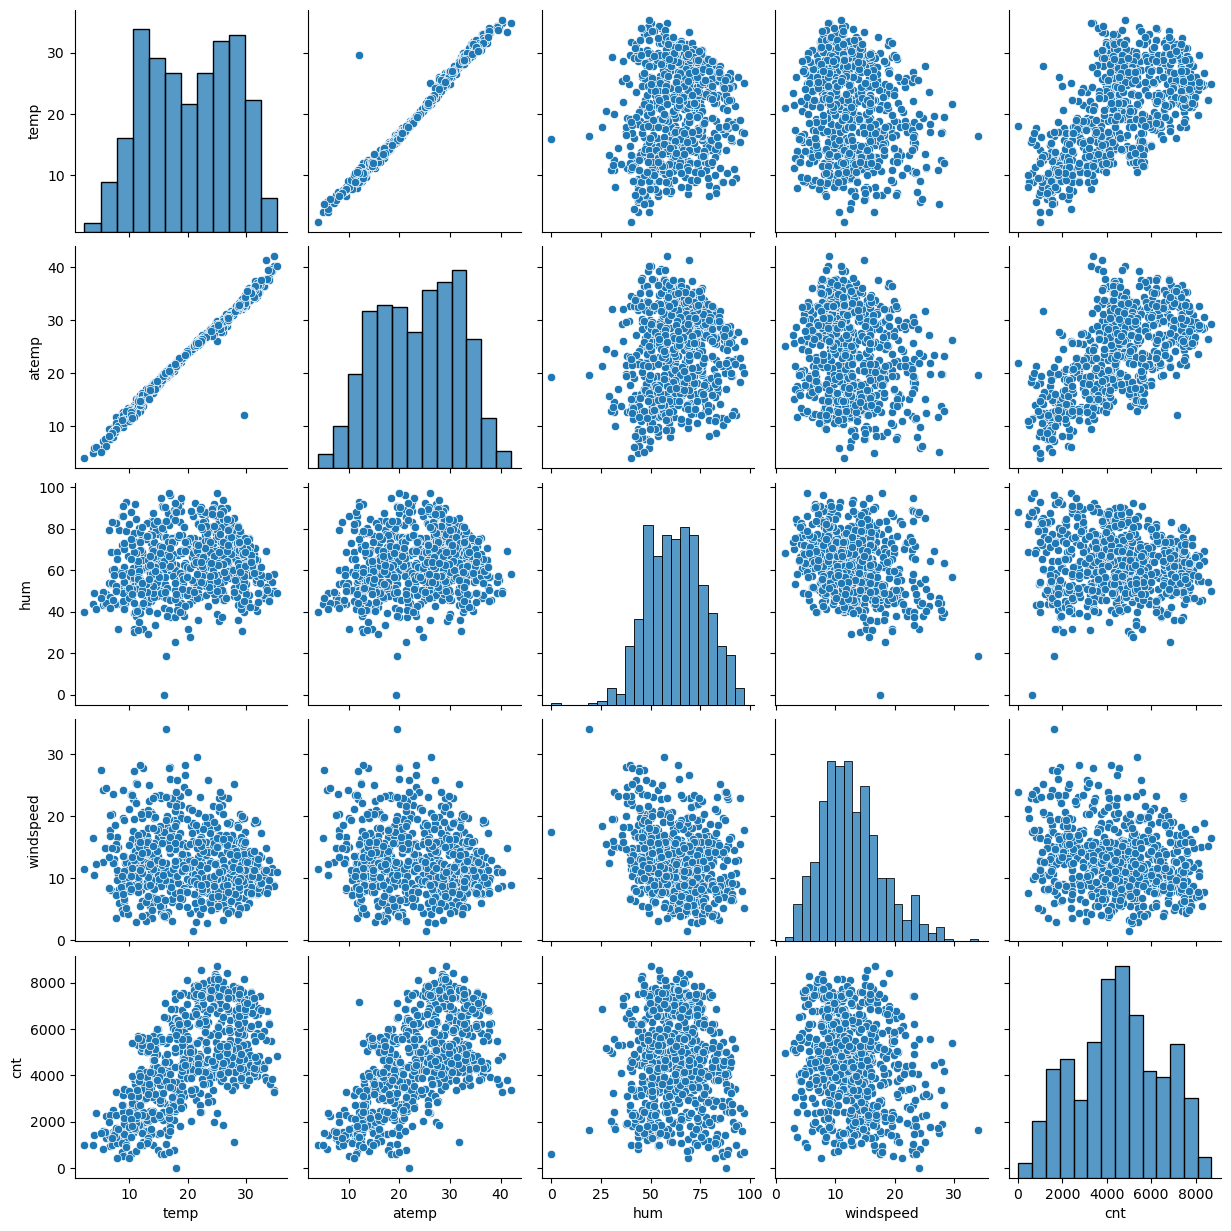

In [816]:
# visualing numerical values using pairplot

var=['temp','atemp','hum','windspeed','cnt']
sns.pairplot(data=bike,vars=var)
plt.show()

#### Dummy Variables

In [817]:
#create dummy variables for season, mnth, weekday, weathersit

season_d = pd.get_dummies(bike['season'], drop_first = True)
mnth_d = pd.get_dummies(bike['mnth'], drop_first = True)
weekday_d = pd.get_dummies(bike['weekday'], drop_first = True)
weathersit_d = pd.get_dummies(bike['weathersit'], drop_first = True)

In [818]:
# cancate the dummy data
df_d=  pd.concat([season_d, mnth_d,weekday_d,weathersit_d], axis = 1)

In [819]:
#show the dummy variables created
df_d.head()

,spring,summer,winter,aug,dec,feb,jan,july,june,mar,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snowrain,misty
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [820]:
# cancatenate the data in main dataframe
bike = pd.concat([bike,df_d],axis=1)

In [821]:
#reading the updated dataframe
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snowrain,misty
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [822]:
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it

bike.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [823]:
bike.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snowrain,misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [824]:
# check the new shape
bike.shape

(730, 30)

In [825]:
# check data types
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   spring          730 non-null    uint8  
 9   summer          730 non-null    uint8  
 10  winter          730 non-null    uint8  
 11  aug             730 non-null    uint8  
 12  dec             730 non-null    uint8  
 13  feb             730 non-null    uint8  
 14  jan             730 non-null    uint8  
 15  july            730 non-null    uint8  
 16  june            730 non-null    uint8  
 17  mar             730 non-null    uin

In [826]:
#convert year to int type
bike['yr']= bike['yr'].astype(int)

In [827]:
#check data types
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int32  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   spring          730 non-null    uint8  
 9   summer          730 non-null    uint8  
 10  winter          730 non-null    uint8  
 11  aug             730 non-null    uint8  
 12  dec             730 non-null    uint8  
 13  feb             730 non-null    uint8  
 14  jan             730 non-null    uint8  
 15  july            730 non-null    uint8  
 16  june            730 non-null    uint8  
 17  mar             730 non-null    uin

###  Splitting the Data into Training and Testing Sets

In [828]:
# create test and train dataset

np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [829]:
#check train dataframe shape
bike_train.shape

(510, 30)

In [830]:
#check test dataframe shape
bike_test.shape

(219, 30)

#### Rescaling the Features

In [831]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [832]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [833]:
# check data
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snowrain,misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [834]:
# check data types
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              510 non-null    int32  
 1   holiday         510 non-null    int64  
 2   workingday      510 non-null    int64  
 3   temp            510 non-null    float64
 4   atemp           510 non-null    float64
 5   hum             510 non-null    float64
 6   windspeed       510 non-null    float64
 7   cnt             510 non-null    float64
 8   spring          510 non-null    uint8  
 9   summer          510 non-null    uint8  
 10  winter          510 non-null    uint8  
 11  aug             510 non-null    uint8  
 12  dec             510 non-null    uint8  
 13  feb             510 non-null    uint8  
 14  jan             510 non-null    uint8  
 15  july            510 non-null    uint8  
 16  june            510 non-null    uint8  
 17  mar             510 non-null    ui

In [835]:
#dataset description
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snowrain,misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


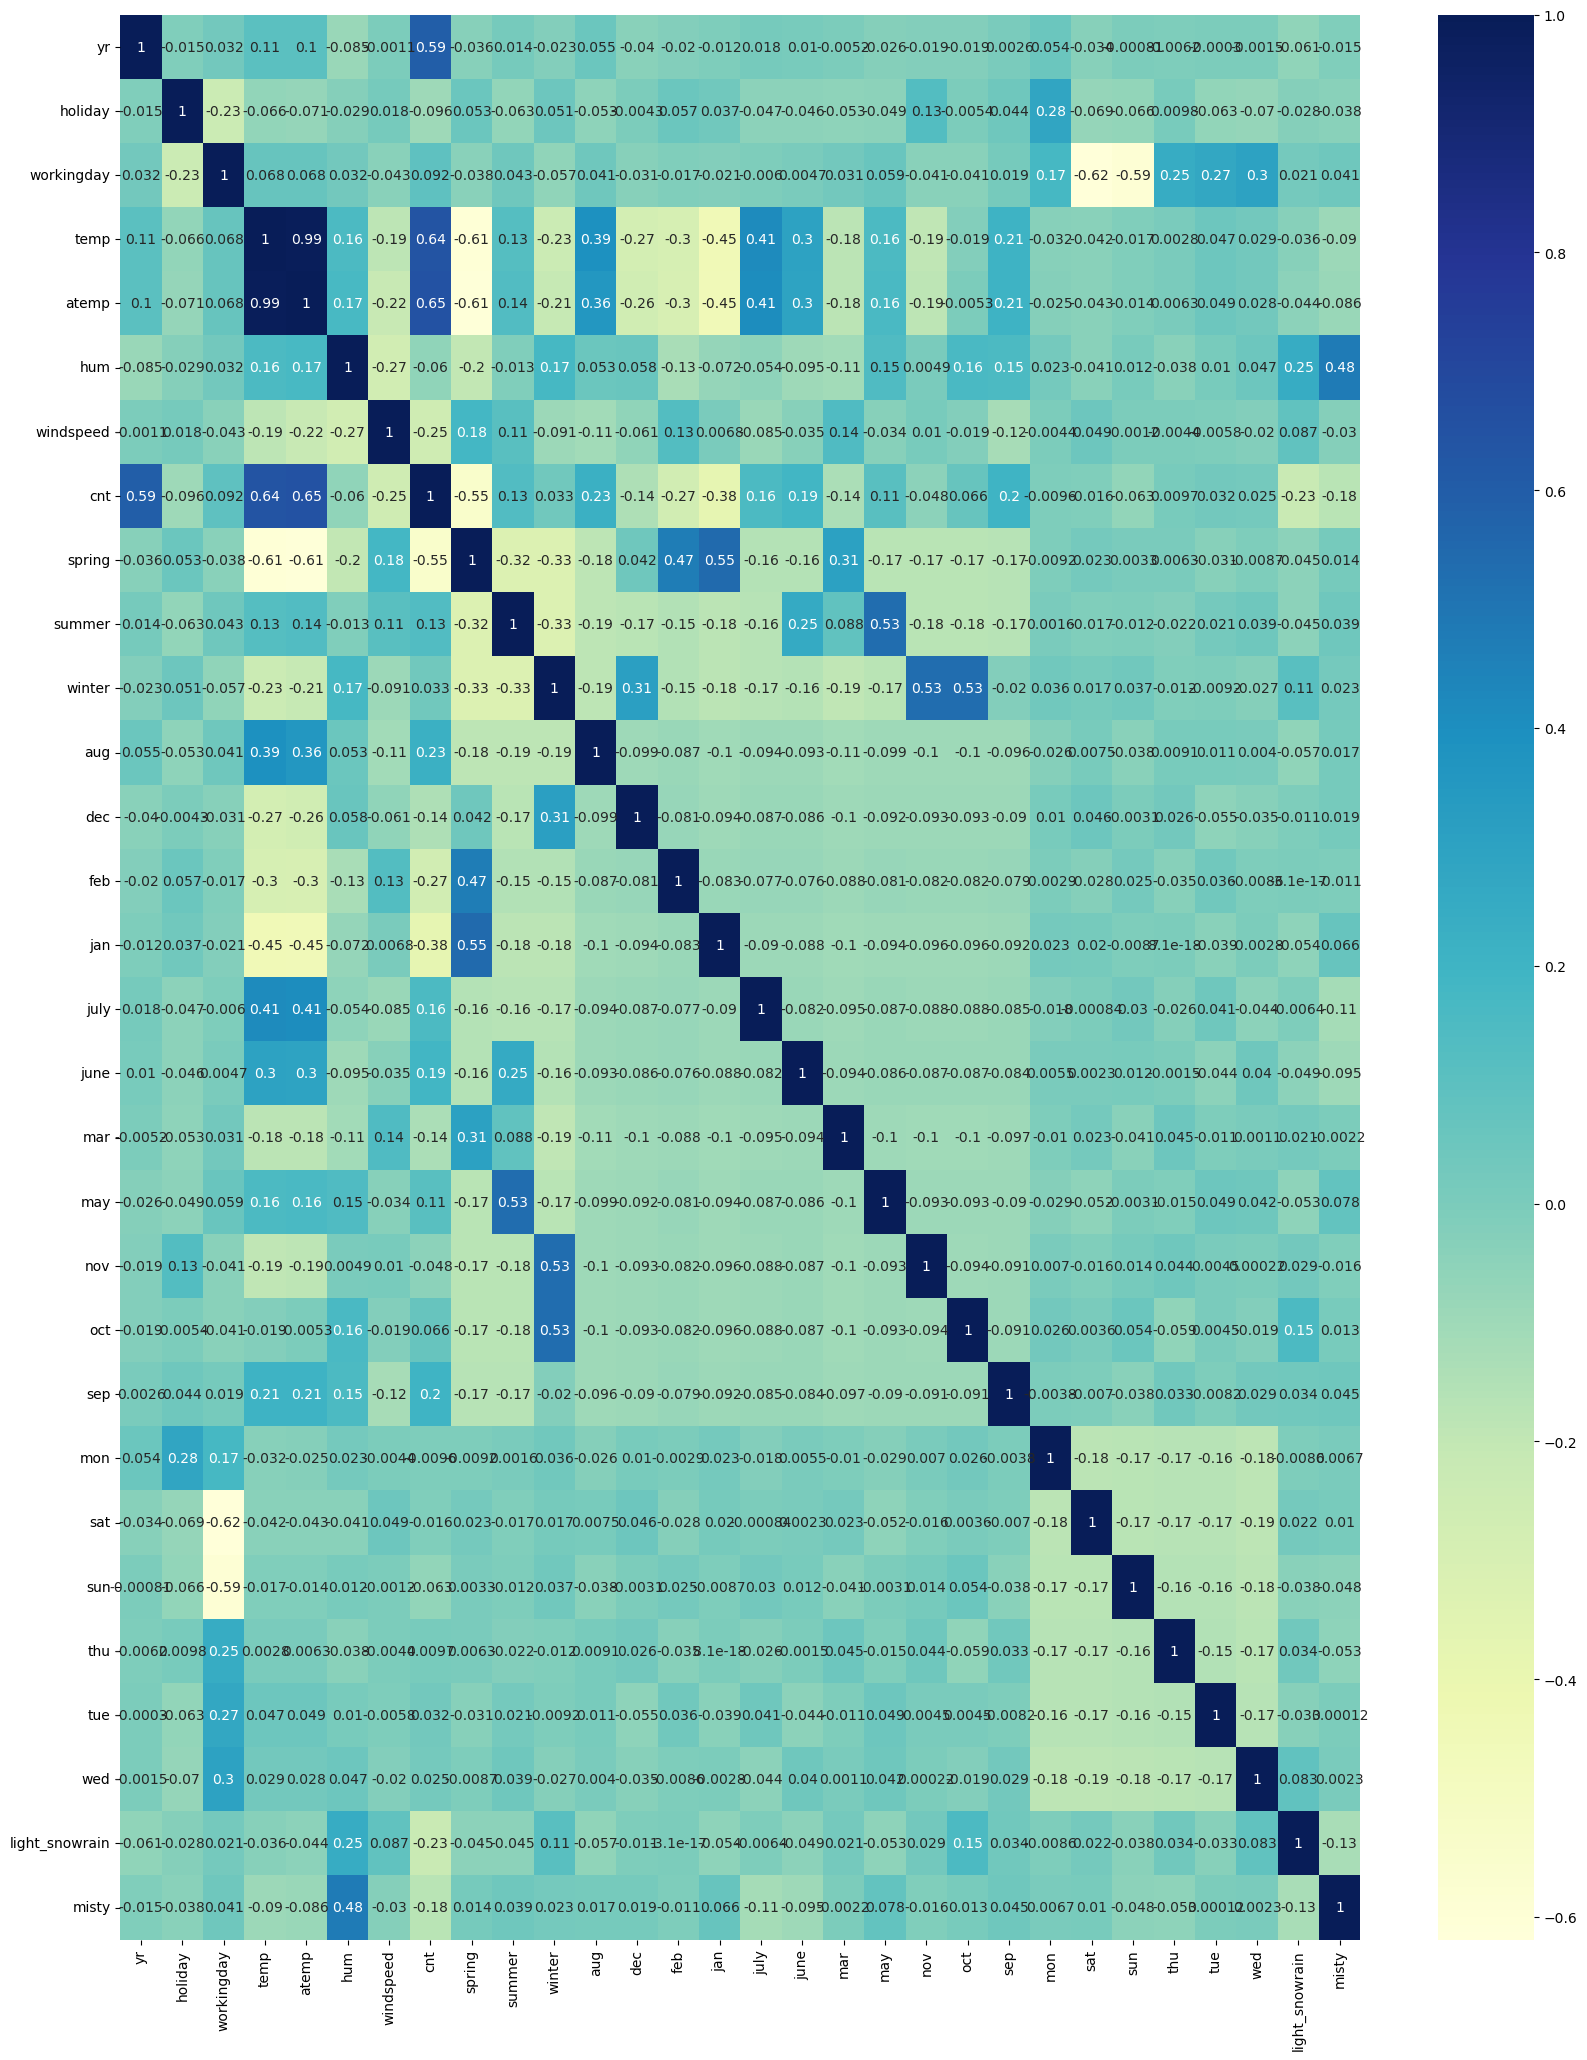

In [836]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 25))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- temp and atemp shows veri good correlation
- cnt shows good relationship with temp and year
- misty weather shows good relationshio with hum.
- Jun,Jul, Aug show good relationship with temp

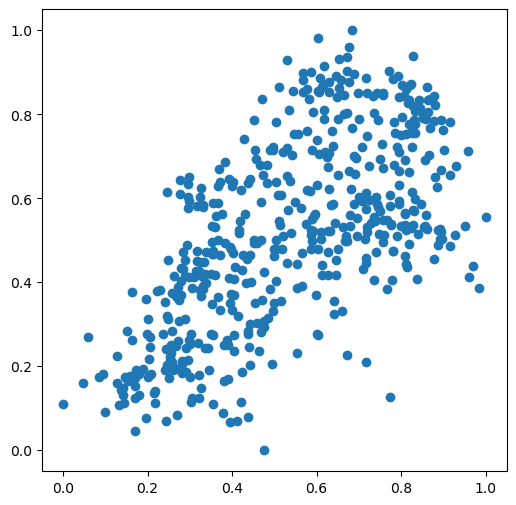

In [837]:
# visualising correlation between temp & cnt

plt.figure(figsize=[6,6])
plt.scatter(bike_train.temp, bike_train.cnt)
plt.show()

Positive correlation is shown between cnt & temp

#### Dividing into X and Y sets for the model building

In [838]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [839]:
#print train data set
print(y_train.head())
print(X_train.head())

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64
     yr  holiday  workingday      temp     atemp       hum  windspeed  spring  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794       0   
576   1        0           1  0.815169  0.766351  0.725633   0.264686       0   
426   1        0           0  0.442393  0.438975  0.640189   0.255342       1   
728   1        0           0  0.245101  0.200348  0.498067   0.663106       1   
482   1        0           0  0.395666  0.391735  0.504508   0.188475       0   

     summer  winter  ...  oct  sep  mon  sat  sun  thu  tue  wed  \
653       0       1  ...    1    0    0    0    0    0    1    0   
576       0       0  ...    0    0    0    0    0    0    1    0   
426       0       0  ...    0    0    0    1    0    0    0    0   
728       0       0  ...    0    0    0    0    1    0    0    0   
482       1       0  ...    0    0    0    1    0    0    0    0   

#### Building a linear model using RFE

In [840]:
# Using Recursive feature elimination to build model
#Selecting 13 feature to buid the model

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=13)
rfe = rfe.fit(X_train, y_train)

In [841]:
#list of parameter used for RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 15),
 ('dec', False, 5),
 ('feb', False, 6),
 ('jan', False, 3),
 ('july', True, 1),
 ('june', False, 7),
 ('mar', False, 11),
 ('may', False, 17),
 ('nov', False, 4),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 16),
 ('sat', True, 1),
 ('sun', False, 9),
 ('thu', False, 14),
 ('tue', False, 10),
 ('wed', False, 12),
 ('light_snowrain', True, 1),
 ('misty', True, 1)]

In [842]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'july', 'sep', 'sat', 'light_snowrain', 'misty'],
      dtype='object')


In [843]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may',
       'nov', 'oct', 'mon', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

#### Building a linear model

Fit a regression line through the training data using `statsmodels`. 

In [844]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [845]:
# function to calculate VIF

def VIF(param):
    vif = pd.DataFrame()
    X = param
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 



In [846]:
VIF(X_train_rfe)

,Features,VIF
3,hum,28.06
2,temp,16.05
4,windspeed,4.67
5,spring,4.03
7,winter,3.36
6,summer,2.78
12,misty,2.28
0,yr,2.08
8,july,1.58
9,sep,1.39


In [847]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_rfe)

In [848]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

In [849]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          7.51e-190
Time:                        18:16:42   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     496   BIC:                            -934.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2796      0.035      8.

In [850]:
# We can drop hum variable as it has high VIF
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
2,temp,5.12
3,windspeed,4.62
5,summer,2.22
4,spring,2.10
0,yr,2.07
6,winter,1.80
7,july,1.58
11,misty,1.55
8,sep,1.34
9,sat,1.19


#### Rebuilding model

In [851]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [852]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [853]:
# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.4
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          7.97e-187
Time:                        18:16:45   Log-Likelihood:                 500.76
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     497   BIC:                            -920.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1962      0.030      6.

In [854]:
# We can drop sat variable as it has high p value
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.21
4,spring,2.08
0,yr,2.07
6,winter,1.79
7,july,1.58
10,misty,1.55
8,sep,1.34
9,light_snowrain,1.08


In [855]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [856]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [857]:
# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          2.40e-187
Time:                        18:16:48   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1996      0.030      6.

In [858]:
# We can drop temp variable as it has high VIF
X_train_new = X_train_new.drop(['temp'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
2,windspeed,3.81
3,spring,2.07
4,summer,2.00
0,yr,1.83
5,winter,1.74
9,misty,1.51
6,july,1.19
7,sep,1.16
8,light_snowrain,1.08
1,holiday,1.04


In [859]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 
# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.1
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          3.17e-149
Time:                        18:16:50   Log-Likelihood:                 406.24
No. Observations:                 510   AIC:                            -790.5
Df Residuals:                     499   BIC:                            -743.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5843      0.017     34.

In [860]:
# We can drop july variable as it has high p value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
2,windspeed,3.46
3,spring,1.91
4,summer,1.85
0,yr,1.77
5,winter,1.63
8,misty,1.51
6,sep,1.14
7,light_snowrain,1.08
1,holiday,1.04


In [861]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 
# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     179.2
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          2.74e-150
Time:                        18:16:51   Log-Likelihood:                 406.06
No. Observations:                 510   AIC:                            -792.1
Df Residuals:                     500   BIC:                            -749.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5795      0.015     39.

p value and VIF values looks good

#### Residual Analysis of the train data

We will check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [862]:
#train dataset
X_train_lm

,const,yr,holiday,windspeed,spring,summer,winter,sep,light_snowrain,misty
653,1.0,1,0,0.300794,0,0,1,0,0,0
576,1.0,1,0,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.255342,1,0,0,0,0,1
728,1.0,1,0,0.663106,1,0,0,0,0,0
482,1.0,1,0,0.188475,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.355596,0,1,0,0,0,1
578,1.0,1,0,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.111379,1,0,0,0,0,0
350,1.0,0,0,0.431816,0,0,1,0,0,1


In [863]:
#Predicted value model
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

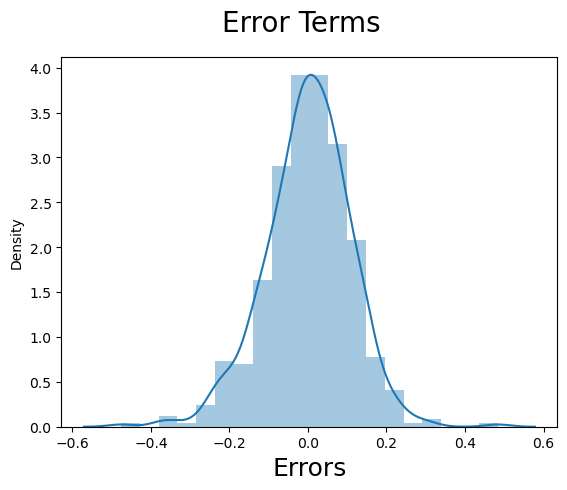

In [864]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error term is having mean at 0 and following normal distribution so assumption holds true

#### Homoscedasticity


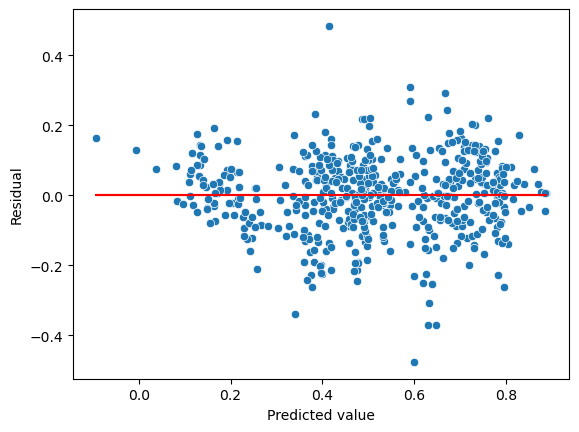

In [865]:
y_train_pred = lm.predict(X_train_lm)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train_pred,y=residual)
plt.plot(y_train_pred,y_train_pred-y_train_pred , '-r')
plt.xlabel('Predicted value')
plt.ylabel('Residual')
plt.show()

No definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot 

### Making Predictions Using the Final Model¶
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model

In [866]:
# Applying scaling

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snowrain,misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [867]:
# divide into x_test & y_test
y_test = bike_test.pop('cnt')
X_test = bike_test

In [868]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [869]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [870]:
#check R2 value for test data set
print(r2_score(y_test, y_pred))

0.7412090812945695


### Model Evaluation 
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

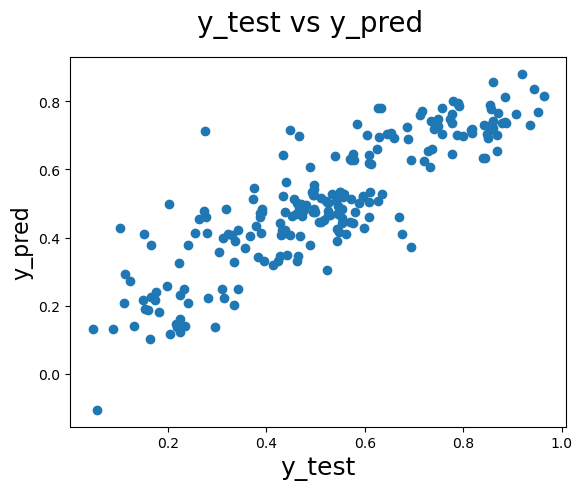

In [871]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

In [872]:
# check coefficient
lm.params

const             0.579505
yr                0.247224
holiday          -0.100770
windspeed        -0.170504
spring           -0.295903
summer           -0.041662
winter           -0.073646
sep               0.076163
light_snowrain   -0.297098
misty            -0.090530
dtype: float64

We can see that the equation of our best fitted line is:

𝑐𝑛𝑡=0.5795+0.2472 x yr -0.1008 × ℎ𝑜𝑙𝑖𝑑𝑎𝑦 −0.1705 × 𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑 - 0.2959 x spring- 0.0416 x summer- 0.0736 x winter + 0.0761 x sep-0.2970 x light_snowrain-0.0905 x misty

#### Comparision between test and training data

Training R2 = 0.763 <br>
Test R2 = 0.7412090812945695 <br>

Conclusion - cnt depends upon yr, holiday, windspeed, spring, summer, winter, sep, light_snowrain & misty